# Improve Global Cross correlation


In [13]:
!ls fits
!pip install requests




0170_goodman_comp_400M2_GG455_HgArNe_Domelights_OFF.fits
cfzsto_0199_EG21_400M2_GG455.fits
cfzsto_0199_goodman_comp_600Mid_GG385_Ne.fits
ecfzst_0177_comp_600m_359.58-405.87.fits
goodman_comp_400M2_GG455_Ne.fits
goodman_comp_600Mid_GG385_HgArNe.fits
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 61 kB 529 kB/s eta 0:00:011
     |████████████████████████████████| 178 kB 6.9 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 1.1 MB/s  eta 0:00:01
     |████████████████████████████████| 138 kB 32.8 MB/s eta 0:00:01
     |████████████████████████████████| 147 kB 28.2 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [14]:
new_lamp = './fits/ecfzst_0177_comp_600m_359.58-405.87.fits'
ref_lamp = './fits/goodman_comp_600Mid_GG385_HgArNe.fits'

In [21]:
from ccdproc import CCDData
import matplotlib.pyplot as plt

from goodman_pipeline.wcs import WCS
from goodman_pipeline.core import bin_reference_data, cross_correlation

wcs = WCS()

In [22]:
new = CCDData.read(new_lamp, unit='adu')
ref = CCDData.read(ref_lamp, unit='adu')


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


In [23]:
ref_w_ax, ref.data = wcs.read_gsp_wcs(ccd=ref)

ref_w_ax, ref.data = bin_reference_data(wavelength=ref_w_ax, intensity=ref.data, serial_binning=2)

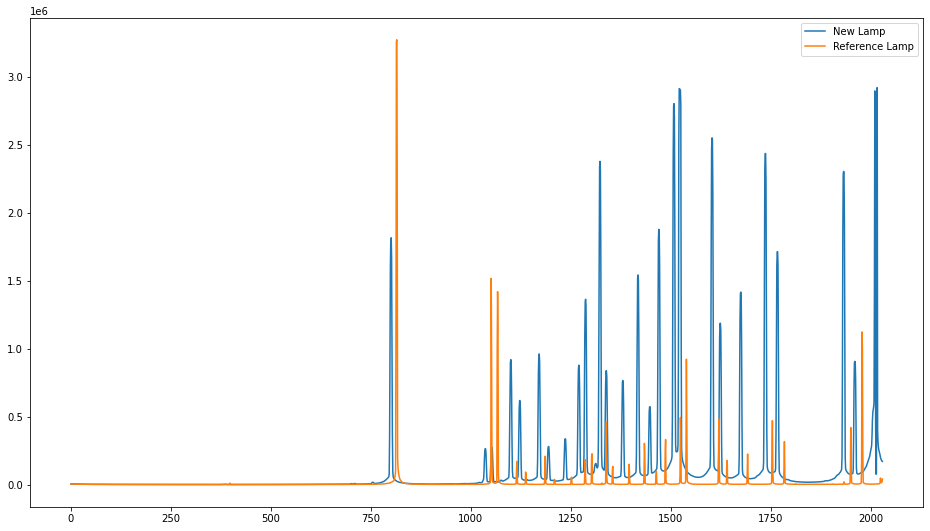

In [24]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(new.data, label='New Lamp')
ax.plot(ref.data, label='Reference Lamp')
plt.legend(loc='best')

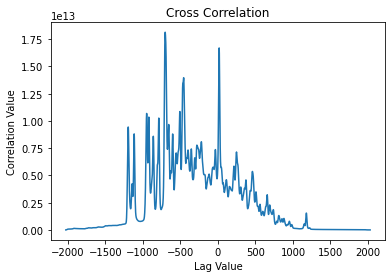

<Figure size 432x288 with 0 Axes>

In [26]:
import re
slit_size = float(re.sub('["A-Za-z_ ]', '', new.header['SLIT']))
global_cross_correlation = cross_correlation(reference=ref.data, compared=new.data, slit_size=slit_size, serial_binning=2, plot=True)

# Now: Subtract Background to lamps